# Production Technology

The dataset contains `N = 441` firms observed over `T = 12` years, 1968-1979. There variables are: 
* `lcap`: Log of capital stock, $k_{it}$ 
* `lemp`: log of employment, $\ell_{it}$ 
* `ldsa`: log of deflated sales, $y_{it}$
* `year`: the calendar year of the observation, `year` $ = 1968, ..., 1979$, 
* `firmid`: anonymized indicator variable for the firm, $i = 1, ..., N$, with $N=441$. 

Tjekliste for hvad vi skal lave (I Python)
1. Lave en regressionskode.py (Eventuel brug koden fra holdundervisning 2)

2. Definer y og x for en fixed effect model
3. Kører regressioner (b_hat) for fixed effect.
4. Regn standard fejl og t-values
5. Output resultater i latex-format (Fra en tidligeere holdundervisning)

4. Gør alt det samme men for random effect
5. Lav en Hausmann test (er FE statistisk signifikant fra RE)

In [32]:
import pandas as pd 
import numpy as np
import seaborn as sns

In [33]:
dat = pd.read_csv('firms.csv')

In [34]:
dat.sample(5)

,firmid,year,lcap,lemp,ldsa
3040,254,1972,0.180137,0.155079,0.314613
2027,169,1979,0.482469,0.411587,0.975801
1496,125,1976,-1.524880,-1.681730,-1.477490
407,34,1979,1.784599,1.564637,1.573345
1299,109,1971,0.980508,0.870777,0.701465


In [35]:
dat.year.unique()

array([1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979])

# Descriptives

In [36]:
dat.describe()

,firmid,year,lcap,lemp,ldsa
count,5292.000000,5292.000000,5.292000e+03,5.292000e+03,5.292000e+03
mean,221.000000,1973.500000,-7.125472e-09,-1.252834e-08,4.695767e-09
std,127.317437,3.452379,1.310973e+00,1.180122e+00,1.232499e+00
min,1.000000,1968.000000,-3.864950e+00,-3.382780e+00,-3.551540e+00
25%,111.000000,1970.750000,-9.083267e-01,-7.855270e-01,-9.279720e-01
50%,221.000000,1973.500000,-1.180615e-01,-1.137295e-01,-1.029710e-01
75%,331.000000,1976.250000,9.063340e-01,7.930060e-01,8.562296e-01
max,441.000000,1979.000000,4.103687e+00,3.371332e+00,3.913391e+00


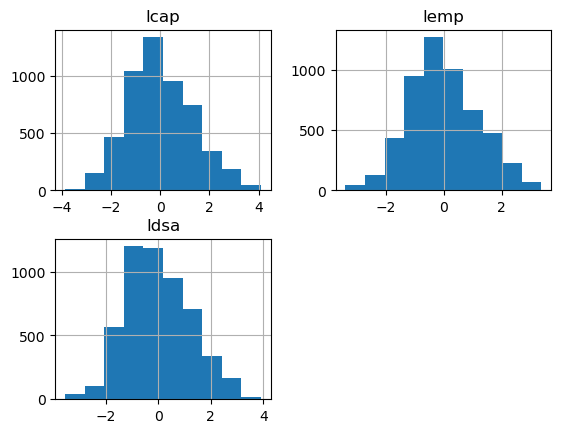

In [37]:
dat[['lcap','lemp','ldsa']].hist();

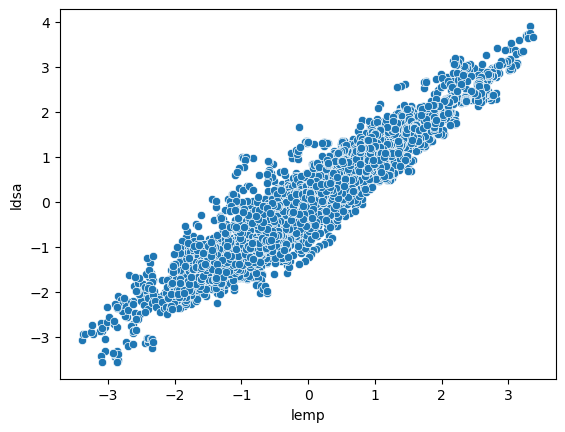

In [38]:
sns.scatterplot(x='lemp', y='ldsa', data=dat); 

# Converting data to numpy format 

In [39]:
dat.ldsa.values.shape

(5292,)

In [40]:
N = dat.firmid.unique().size
T = dat.year.unique().size
assert dat.shape[0] == N*T, f'Error: data is not a balanced panel'
print(f'Data has N={N} and T={T}')

Data has N=441 and T=12


Extract data from `pandas` to `numpy` arrays. 

In [41]:
y = dat.ldsa.values.reshape((N*T,1))

ones = np.ones((N*T,1))
l = dat.lemp.values.reshape((N*T,1))
k = dat.lcap.values.reshape((N*T,1))
X = np.hstack([ones, l, k])

In [42]:
import sys
sys.path.append("/mnt/data")   # Tilføj mappen hvor firm_panel_toolbox.py ligger

import firm_panel_toolbox as fpt

Estimate Pooled OLS

In [43]:
pols_result = estimate(y, X, T=T)
print_table(pols_result)

                    POLS REGRESSION RESULTS
Number of observations: 5292
R-squared: 0.9139
Residual sum of squares: 691.9438
Standard error of regression: 0.3617
------------------------------------------------------------
Variable        Coefficient  Std Error    t-statistic 
------------------------------------------------------------
Constant             0.0000      0.0050      0.0000
Log Employment       0.6748      0.0102     66.4625
Log Capital          0.3100      0.0091     33.9237


Make pooled with robust standard errors

In [47]:
# Pooled OLS med klynge-robuste SE (firmeniveau)
res_pool, labels = fpt.run_pooled("/mnt/data/firms.csv", robust=True)
fpt.print_pooled("/mnt/data/firms.csv")     # pæn tabel

# Hvis du vil bruge tallene videre:
beta = res_pool['b_hat']        # [const, k, l]
se   = res_pool['se']           # cluster-robuste SE
t    = res_pool['t_values']
R2   = float(res_pool['R2'])


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/firms.csv'